In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import warnings
import numpy as np
from pandas.api.types import is_numeric_dtype
from datetime import timedelta
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ModuleNotFoundError: No module named 'pandas'

In [2]:
application = pd.read_csv("creditcard.csv")

In [3]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [4]:
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
application.tail()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0
438556,6842885,F,N,Y,0,121500.0,Working,Secondary / secondary special,Married,House / apartment,-18858,-1201,1,0,1,0,Sales staff,2.0


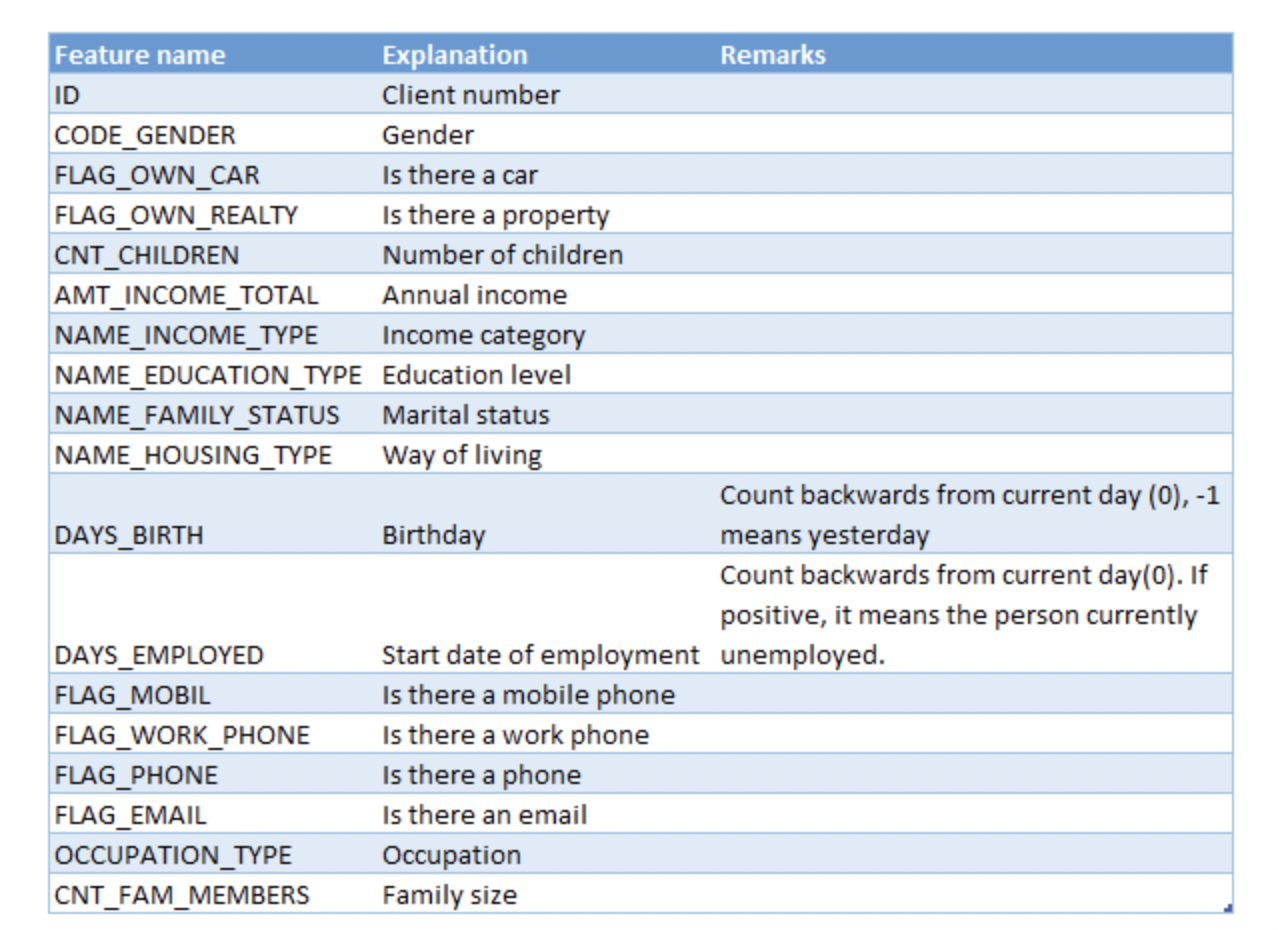

In [6]:
application.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [7]:
credit_status=pd.read_csv("credit_record.csv")

In [8]:
credit_status.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [9]:
credit_status.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [10]:
out_df =credit_status.groupby(['MONTHS_BALANCE']).agg(
    # Counts
    counts=('MONTHS_BALANCE', lambda x: len(x) ),
    # Percent
    percent = ('MONTHS_BALANCE', lambda x: (len(x)*100/ len(credit_status['MONTHS_BALANCE'])))
    ).reset_index()
out_df


,MONTHS_BALANCE,counts,percent
0,-60,415,0.039578
1,-59,820,0.078201
2,-58,1255,0.119686
3,-57,1649,0.157261
4,-56,2109,0.201130
...,...,...,...
56,-4,33365,3.181937
57,-3,33854,3.228572
58,-2,34209,3.262428
59,-1,34436,3.284076


In [11]:
pd.pivot_table(out_df,index=['MONTHS_BALANCE'])

,counts,percent
MONTHS_BALANCE,,
-60,415,0.039578
-59,820,0.078201
-58,1255,0.119686
-57,1649,0.157261
-56,2109,0.201130
...,...,...
-4,33365,3.181937
-3,33854,3.228572
-2,34209,3.262428


In [12]:
# rows in Application Data
len(application)

438557

In [13]:
# rows in credit status
len(credit_status)


1048575

In [14]:
app_credit_status= pd.merge(application,credit_status, how='inner', on='ID')
len(app_credit_status)

777715

In [15]:
credit_card_first_month =credit_status.groupby(['ID']).agg(
   start_month=  ('MONTHS_BALANCE', min)
    ).reset_index()

In [16]:
credit_card_first_month.head()

,ID,start_month
0,5001711,-3
1,5001712,-18
2,5001713,-21
3,5001714,-14
4,5001715,-59


In [17]:
credit_card_first_month['account_open_month']= datetime.datetime.strptime("2020-01-01", "%Y-%m-%d")
credit_card_first_month['account_open_month']= credit_card_first_month['account_open_month'] + credit_card_first_month['start_month'].values.astype("timedelta64[M]")
credit_card_first_month['account_open_month']=credit_card_first_month['account_open_month'].dt.strftime('%b-%Y')

In [18]:
credit_card_first_month.head()

,ID,start_month,account_open_month
0,5001711,-3,Oct-2019
1,5001712,-18,Jul-2018
2,5001713,-21,Apr-2018
3,5001714,-14,Nov-2018
4,5001715,-59,Feb-2015


In [19]:
# join the table
credit_start_status = pd.merge(credit_card_first_month, credit_status, how='left', on=['ID'])

credit_start_status['start_month']=abs(credit_start_status['start_month'])+credit_start_status['MONTHS_BALANCE']

In [20]:
credit_start_status.head()

,ID,start_month,account_open_month,MONTHS_BALANCE,STATUS
0,5001711,3,Oct-2019,0,X
1,5001711,2,Oct-2019,-1,0
2,5001711,1,Oct-2019,-2,0
3,5001711,0,Oct-2019,-3,0
4,5001712,18,Jul-2018,0,C


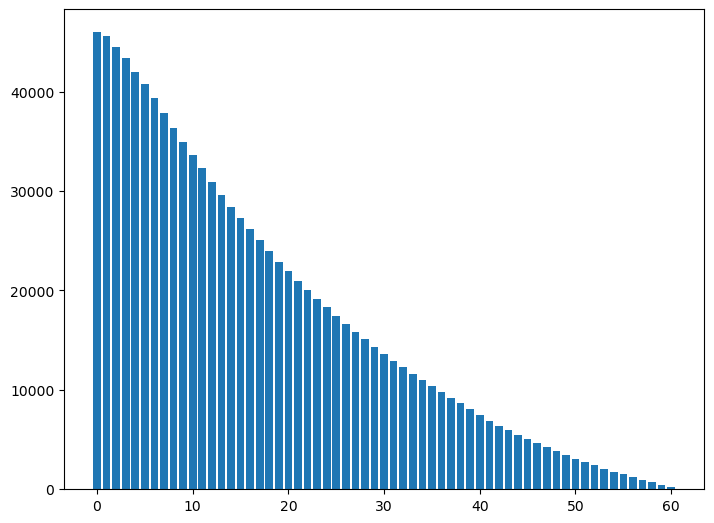

In [21]:
accounts_counts =pd.DataFrame({'start_month':credit_start_status.groupby('start_month')['start_month'].count()})
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(accounts_counts.index,accounts_counts['start_month'])
plt.show()

In [22]:
month_status_counts = credit_start_status.groupby(['start_month', 'STATUS']).size().reset_index(name='counts')
month_counts = credit_start_status.groupby(['start_month']).size().reset_index(name='month_counts')
# join the table
month_status_pct = pd.merge(month_status_counts, month_counts, how='left', on=['start_month'])
month_status_pct['status_pct']=month_status_pct['counts']/month_status_pct['month_counts']*100
month_status_pct= month_status_pct.loc[:,['start_month','STATUS','status_pct']]


In [23]:
# Restucture
month_status_pct1 = month_status_pct.pivot(index='start_month', columns='STATUS', values='status_pct')
# Fill with 0
month_status_pct1=month_status_pct1.fillna(0).reset_index()

Text(0, 0.5, '% Bad Rate')

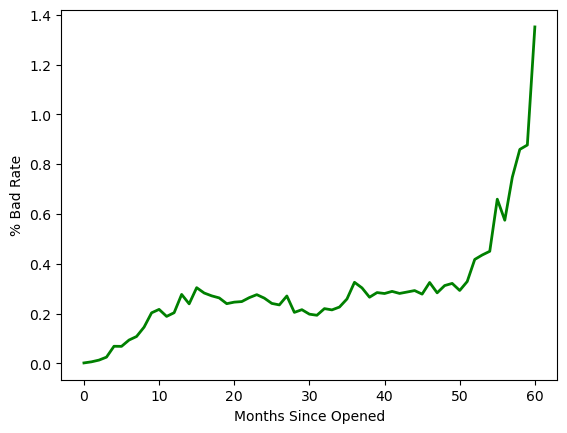

In [24]:
plt.plot(month_status_pct1.index, month_status_pct1['4']+month_status_pct1['5'],
     color='green', 
     linestyle='solid',
     linewidth=2, 
     markersize=12)
plt.xlabel('Months Since Opened')
plt.ylabel('% Bad Rate')


In [25]:
month_status_pct2 = month_status_pct1.loc[month_status_pct1.index<=50]
# drop column start_month
month_status_pct2=month_status_pct2.drop('start_month', axis=1)

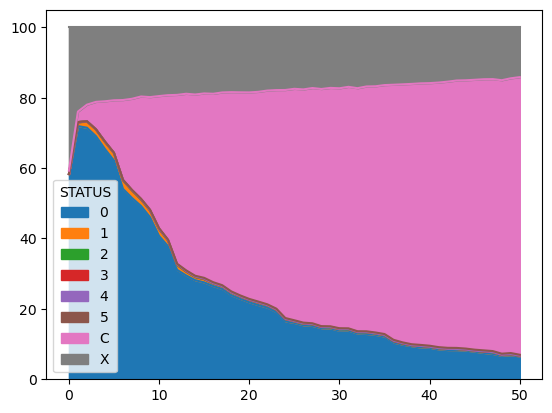

In [26]:
month_status_pct2.plot.area(stacked=True);
plt.show(block=True);

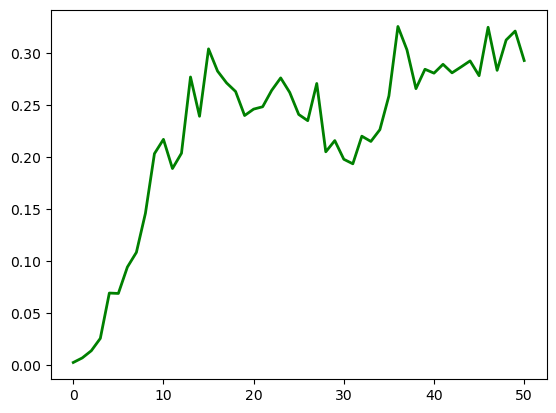

In [27]:
plt.plot(month_status_pct2.index, month_status_pct2['4']+month_status_pct2['5'],
     color='green', 
     linestyle='solid',
     linewidth=2, 
     markersize=12)

In [28]:
warnings.filterwarnings("ignore")
credit_start_status.groupby('STATUS')['STATUS'].count()
# We will remove rows with status as C and X
credit_start_status1 = credit_start_status.loc[ (credit_status['STATUS'] !='X') & (credit_status['STATUS'] !='C') ,:]
# Change status as numeric
credit_start_status1['status'] = credit_start_status1['STATUS'].astype('int64', copy=False)
credit_start_status1 = credit_start_status1.loc[credit_start_status1['start_month']<=18,['ID','start_month','status']]


In [29]:
credit_start_status1

,ID,start_month,status
1,5001711,2,0
2,5001711,1,0
3,5001711,0,0
13,5001712,9,0
14,5001712,8,0
...,...,...,...
1048540,5150484,2,0
1048541,5150484,1,0
1048542,5150484,0,0
1048543,5150485,1,0


In [30]:
# Find Max Status Values
status = credit_start_status1.groupby(['ID']).agg(
    # Max Status
    max_status=('status','max')

    ).reset_index()
# Validate
status.groupby('max_status')['max_status'].count()

max_status
0    34830
1     4346
2      305
3       81
4       30
5      159
Name: max_status, dtype: int64

In [31]:
# Define 
status['label']=np.where(status['max_status']>=4, 1,0)
# Validate
status.groupby('label')['label'].count()

label
0    39562
1      189
Name: label, dtype: int64

In [32]:
# Bad Rate 
status.groupby('label')['label'].count()*100/len(status['label'])

label
0    99.52454
1     0.47546
Name: label, dtype: float64

In [33]:
# All with label 1
label_1 = status.loc[status['label']==1,:]
# All with label 0
label_0 = status.loc[status['label']==0,:]
# Select randomly few rows
label_0_biased=label_0.sample(n = 1701) 
# Combined Sample IDs with Biased Sampling

frames = [label_1,label_0_biased]
import pandas as pd
labels_biased = pd.concat(frames)

# Keep only ID and Label Columns

labels_biased=labels_biased.loc[:,['ID','label']]

In [34]:
labels_biased

,ID,label
1156,5003471,1
1380,5003804,1
1885,5004559,1
2091,5004891,1
2753,5008827,1
...,...,...
35577,5132975,0
39596,5150041,0
28750,5111094,0
22903,5085786,0


In [35]:
# Combine Labels and Application Data
model_df = pd.merge (labels_biased, application,how='inner',on=['ID'] )
len(model_df)

1564

In [36]:
model_df.tail()

,ID,label,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
1559,5068038,0,F,N,N,0,112500.0,State servant,Secondary / secondary special,Married,With parents,-17164,-9363,1,0,0,0,Medicine staff,2.0
1560,5132975,0,F,N,Y,2,112500.0,Working,Secondary / secondary special,Married,House / apartment,-14608,-1261,1,1,0,0,Sales staff,4.0
1561,5150041,0,F,Y,Y,0,54000.0,State servant,Secondary / secondary special,Single / not married,House / apartment,-8627,-1537,1,0,0,0,Medicine staff,1.0
1562,5111094,0,M,N,Y,1,270000.0,Working,Secondary / secondary special,Married,House / apartment,-12910,-359,1,0,1,0,Drivers,3.0
1563,5085786,0,M,Y,N,0,157500.0,Commercial associate,Secondary / secondary special,Married,With parents,-17039,-4156,1,0,0,0,Sales staff,2.0


In [37]:
model_df.groupby('label')['label'].count()*100/len(model_df['label'])

label
0    88.810742
1    11.189258
Name: label, dtype: float64

In [38]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1564 entries, 0 to 1563
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1564 non-null   int64  
 1   label                1564 non-null   int64  
 2   CODE_GENDER          1564 non-null   object 
 3   FLAG_OWN_CAR         1564 non-null   object 
 4   FLAG_OWN_REALTY      1564 non-null   object 
 5   CNT_CHILDREN         1564 non-null   int64  
 6   AMT_INCOME_TOTAL     1564 non-null   float64
 7   NAME_INCOME_TYPE     1564 non-null   object 
 8   NAME_EDUCATION_TYPE  1564 non-null   object 
 9   NAME_FAMILY_STATUS   1564 non-null   object 
 10  NAME_HOUSING_TYPE    1564 non-null   object 
 11  DAYS_BIRTH           1564 non-null   int64  
 12  DAYS_EMPLOYED        1564 non-null   int64  
 13  FLAG_MOBIL           1564 non-null   int64  
 14  FLAG_WORK_PHONE      1564 non-null   int64  
 15  FLAG_PHONE           1564 non-null   i

In [39]:
model_df.describe()

,ID,label,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,1.564000e+03,1564.000000,1564.000000,1.564000e+03,1564.000000,1564.000000,1564.0,1564.000000,1564.000000,1564.000000,1564.000000
mean,5.079831e+06,0.111893,0.409847,1.847310e+05,-16006.355499,60015.728900,1.0,0.221228,0.299233,0.093350,2.161765
std,4.137531e+04,0.315335,0.714662,1.007813e+05,4177.303018,138234.412815,0.0,0.415206,0.458068,0.291016,0.892162
min,5.008806e+06,0.000000,0.000000,3.150000e+04,-24820.000000,-14810.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.045528e+06,0.000000,0.000000,1.170000e+05,-19317.500000,-3017.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.079196e+06,0.000000,0.000000,1.575000e+05,-15653.000000,-1427.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115926e+06,0.000000,1.000000,2.250000e+05,-12580.250000,-408.750000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150420e+06,1.000000,5.000000,1.575000e+06,-8242.000000,365243.000000,1.0,1.000000,1.000000,1.000000,7.000000


In [40]:
# Check if missing values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
# source: https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe

missing_values_table(model_df)

Your selected dataframe has 19 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
OCCUPATION_TYPE,463,29.6


In [41]:
# Find Continuous and Categorical Features
def featureType(df):

    columns = df.columns
    rows= len(df)
    colTypeBase=[]
    colType=[]
    for col in columns:
        try:
            try:
                uniq=len(np.unique(df[col]))
            except:
                 uniq=len(df.groupby(col)[col].count())
            if rows>10:
                if is_numeric_dtype(df[col]):
                    
                    if uniq==1:
                        colType.append('Unary')
                        colTypeBase.append('Unary')
                    elif uniq==2:
                        colType.append('Binary')
                        colTypeBase.append('Binary')
                    elif rows/uniq>3 and uniq>5:
                        colType.append('Continuous')
                        colTypeBase.append('Continuous')
                    else:
                        colType.append('Continuous-Ordinal')
                        colTypeBase.append('Ordinal')
                else:
                    if uniq==1:
                        colType.append('Unary')
                        colTypeBase.append('Category-Unary')
                    elif uniq==2:
                        colType.append('Binary')
                        colTypeBase.append('Category-Binary')
                    else:
                        colType.append('Categorical-Nominal')
                        colTypeBase.append('Nominal')
            else:
                if is_numeric_dtype(df[col]):
                    colType.append('Numeric')
                    colTypeBase.append('Numeric')
                else:
                    colType.append('Non-numeric')
                    colTypeBase.append('Non-numeric')
        except:
            colType.append('Issue')
                 
    # Create dataframe    
    df_out =pd.DataFrame({'Feature':columns,
                          'BaseFeatureType':colTypeBase,
                        'AnalysisFeatureType':colType})
    return df_out

featureType(model_df)                 

,Feature,BaseFeatureType,AnalysisFeatureType
0,ID,Ordinal,Continuous-Ordinal
1,label,Binary,Binary
2,CODE_GENDER,Category-Binary,Binary
3,FLAG_OWN_CAR,Category-Binary,Binary
4,FLAG_OWN_REALTY,Category-Binary,Binary
5,CNT_CHILDREN,Continuous,Continuous
6,AMT_INCOME_TOTAL,Continuous,Continuous
7,NAME_INCOME_TYPE,Nominal,Categorical-Nominal
8,NAME_EDUCATION_TYPE,Nominal,Categorical-Nominal
9,NAME_FAMILY_STATUS,Nominal,Categorical-Nominal


In [42]:
model_df['BIRTH_DATE'] = datetime.datetime.strptime("2020-01-01", "%Y-%m-%d") + model_df['DAYS_BIRTH'].apply(pd.offsets.Day)

In [43]:
# DAYS_EMPLOYED: Count backwards from current day(0). If positive, it means the person currently unemployed.
# Update DAYS_EMPLOYED greater than 0 to 31
model_df.loc[model_df.DAYS_EMPLOYED >0, "DAYS_EMPLOYED"] = 31
model_df['EMPLOYMENT_START_DATE'] = datetime.datetime.strptime("2020-01-01", "%Y-%m-%d") + model_df['DAYS_EMPLOYED'].apply(pd.offsets.Day)

In [44]:
model_df.head()

,ID,label,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,BIRTH_DATE,EMPLOYMENT_START_DATE
0,5008827,1,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,...,-18772,31,1,0,0,0,NaN,2.0,1968-08-09,2020-02-01
1,5009744,1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,...,-13557,-586,1,1,1,0,NaN,2.0,1982-11-19,2018-05-25
2,5009746,1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,...,-13557,-586,1,1,1,0,NaN,2.0,1982-11-19,2018-05-25
3,5009749,1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,...,-13557,-586,1,1,1,0,NaN,2.0,1982-11-19,2018-05-25
4,5009752,1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,...,-13557,-586,1,1,1,0,NaN,2.0,1982-11-19,2018-05-25


In [45]:
model_df = pd.merge (model_df, credit_card_first_month.loc[:,['ID','account_open_month']],how='inner',on=['ID'] )
len(model_df)

1564

In [46]:
# Age in months

model_df['age_months'] = ((pd.to_datetime(model_df['account_open_month'],format='%b-%Y')  - model_df.BIRTH_DATE)/np.timedelta64(1, 'M'))
model_df['age_months'] = model_df['age_months'].astype(int)
# Experience/Employment in Months
model_df['employment_months'] = ((pd.to_datetime(model_df['account_open_month'],format='%b-%Y')  - model_df.EMPLOYMENT_START_DATE)/np.timedelta64(1, 'M'))
model_df['employment_months'] = model_df['employment_months'].astype(int)

In [47]:
model_df.head()

,ID,label,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,BIRTH_DATE,EMPLOYMENT_START_DATE,account_open_month,age_months,employment_months
0,5008827,1,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,...,0,0,0,NaN,2.0,1968-08-09,2020-02-01,Nov-2016,578,-38
1,5009744,1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,...,1,1,0,NaN,2.0,1982-11-19,2018-05-25,Jun-2018,426,0
2,5009746,1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,...,1,1,0,NaN,2.0,1982-11-19,2018-05-25,Jun-2015,390,-35
3,5009749,1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,...,1,1,0,NaN,2.0,1982-11-19,2018-05-25,Oct-2018,430,4
4,5009752,1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,...,1,1,0,NaN,2.0,1982-11-19,2018-05-25,Jul-2017,415,-10


In [48]:
model_df.loc[model_df.employment_months <0, "employment_months"] = -1

In [49]:
model_df.head()

,ID,label,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,BIRTH_DATE,EMPLOYMENT_START_DATE,account_open_month,age_months,employment_months
0,5008827,1,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,...,0,0,0,NaN,2.0,1968-08-09,2020-02-01,Nov-2016,578,-1
1,5009744,1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,...,1,1,0,NaN,2.0,1982-11-19,2018-05-25,Jun-2018,426,0
2,5009746,1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,...,1,1,0,NaN,2.0,1982-11-19,2018-05-25,Jun-2015,390,-1
3,5009749,1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,...,1,1,0,NaN,2.0,1982-11-19,2018-05-25,Oct-2018,430,4
4,5009752,1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,...,1,1,0,NaN,2.0,1982-11-19,2018-05-25,Jul-2017,415,-1


In [50]:
model_df=model_df.drop(['BIRTH_DATE','EMPLOYMENT_START_DATE','account_open_month','DAYS_BIRTH','DAYS_EMPLOYED','FLAG_MOBIL'], axis=1)


In [51]:
featureType(model_df)


,Feature,BaseFeatureType,AnalysisFeatureType
0,ID,Ordinal,Continuous-Ordinal
1,label,Binary,Binary
2,CODE_GENDER,Category-Binary,Binary
3,FLAG_OWN_CAR,Category-Binary,Binary
4,FLAG_OWN_REALTY,Category-Binary,Binary
5,CNT_CHILDREN,Continuous,Continuous
6,AMT_INCOME_TOTAL,Continuous,Continuous
7,NAME_INCOME_TYPE,Nominal,Categorical-Nominal
8,NAME_EDUCATION_TYPE,Nominal,Categorical-Nominal
9,NAME_FAMILY_STATUS,Nominal,Categorical-Nominal


In [52]:
warnings.filterwarnings("ignore")

income_type = model_df.groupby(['NAME_INCOME_TYPE','label'])['NAME_INCOME_TYPE','label'].size().reset_index(name='counts')

# Restucture
income_type = income_type.pivot(index='NAME_INCOME_TYPE', columns='label', values='counts')
# Fill with 0
income_type=income_type.fillna(0).reset_index()
# Rename the columns
income_type.columns=['Income_Type','Label_0','Label_1']

# Calculate Bad Rate for each of the income type
income_type['pct_obs'] = (income_type['Label_0']+income_type['Label_1'])/(sum(income_type['Label_0'])+sum(income_type['Label_1']))
income_type['pct_label_0']= income_type['Label_0']/(income_type['Label_0']+income_type['Label_1'])
income_type['pct_label_1']= income_type['Label_1']/(income_type['Label_0']+income_type['Label_1'])
print(income_type)

            Income_Type  Label_0  Label_1   pct_obs  pct_label_0  pct_label_1
0  Commercial associate      319       50  0.235934     0.864499     0.135501
1             Pensioner      233       42  0.175831     0.847273     0.152727
2         State servant      114        6  0.076726     0.950000     0.050000
3               Working      723       77  0.511509     0.903750     0.096250


In [53]:
model_df.loc[model_df.OCCUPATION_TYPE=='', "OCCUPATION_TYPE"] = "NA"


In [54]:
# One hot Encoding using get_dummies function
model_df2=pd.get_dummies(model_df, columns=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',"NAME_INCOME_TYPE",'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE'])

In [55]:
len(model_df2)

1564

In [56]:
model_df2.columns

Index(['ID', 'label', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'age_months',
       'employment_months', 'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_CAR_N',
       'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Offic

In [57]:
# Features - exclude ID and Label columns
features = model_df2.iloc[:,2:]
# Label - select only label column
label = model_df2.iloc[:,1]

In [58]:
model_df2

,ID,label,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,age_months,employment_months,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,5008827,1,0,180000.0,0,0,0,2.0,578,-1,...,0,0,0,0,0,0,0,0,0,0
1,5009744,1,0,315000.0,1,1,0,2.0,426,0,...,0,0,0,0,0,0,0,0,0,0
2,5009746,1,0,315000.0,1,1,0,2.0,390,-1,...,0,0,0,0,0,0,0,0,0,0
3,5009749,1,0,315000.0,1,1,0,2.0,430,4,...,0,0,0,0,0,0,0,0,0,0
4,5009752,1,0,315000.0,1,1,0,2.0,415,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,5068038,0,0,112500.0,0,0,0,2.0,504,248,...,0,0,0,1,0,0,0,0,0,0
1560,5132975,0,2,112500.0,1,0,0,4.0,476,38,...,0,0,0,0,0,0,1,0,0,0
1561,5150041,0,0,54000.0,0,0,0,1.0,242,9,...,0,0,0,1,0,0,0,0,0,0
1562,5111094,0,1,270000.0,0,1,0,3.0,411,-1,...,0,0,0,0,0,0,0,0,0,0


In [59]:
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=557)

In [60]:
creditxgb = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=10,
 min_child_weight=50,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic'
)

In [61]:
creditxgb.fit(features_train,label_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=10, max_leaves=0, min_child_weight=50, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [62]:
pred_prob = creditxgb.predict_proba(features_train)

# 
pred_prob_1 = pred_prob[:,1]
# find cut off Prod to define class label 1-0.11 (11% Bad)
np.quantile(pred_prob_1,0.88)
pred_class = np.where(pred_prob_1>=0.18,1,0)


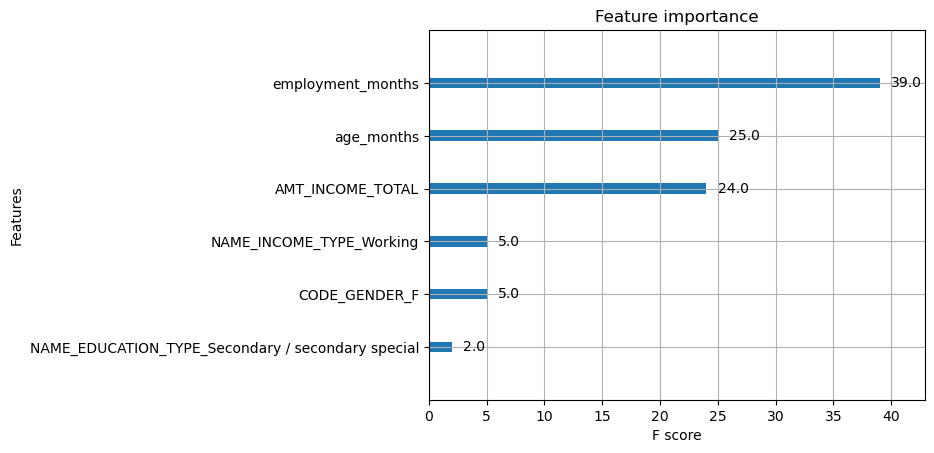

In [63]:
xgb.plot_importance(creditxgb)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [64]:
accuracy = accuracy_score(label_train, pred_class)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
from sklearn import metrics
cnf_matrix_dev = metrics.confusion_matrix(label_train, pred_class)
print(cnf_matrix_dev)

Accuracy: 79.14%
[[943 159]
 [102  47]]


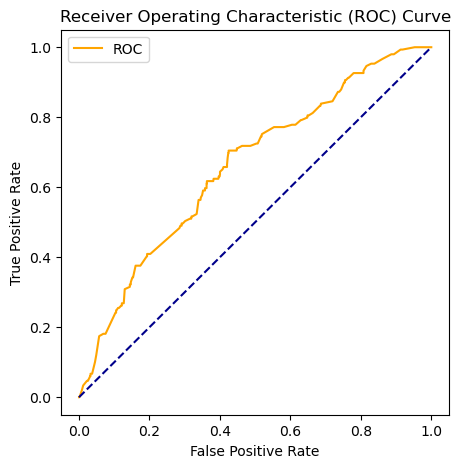

In [65]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
# https://stackabuse.com/understanding-roc-curves-with-python/
label_train
fpr_dev, tpr_dev, thresholds_dev =roc_curve(label_train,pred_prob_1)
plot_roc_curve(fpr_dev, tpr_dev)

In [66]:
Opticreditxgb = xgb.XGBClassifier(
 learning_rate =0.3,
 n_estimators=100,
 max_depth=15,
 min_child_weight=6,
 gamma=0.0,
 subsample=0.9,
 colsample_bytree=0.6,
 objective= 'binary:logistic'
)

Opticreditxgb.fit(features_train,label_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=15, max_leaves=0, min_child_weight=6, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [67]:
accuracy = accuracy_score(label_train, pred_class)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
from sklearn import metrics
cnf_matrix_dev = metrics.confusion_matrix(label_train, pred_class)
print(cnf_matrix_dev)

Accuracy: 79.14%
[[943 159]
 [102  47]]


In [68]:
pred_prob = Opticreditxgb.predict_proba(features_train)

# 
pred_prob_1 = pred_prob[:,1]
# find cut off Prod to define class label 1-0.11 (11% Bad)
np.quantile(pred_prob_1,0.88)

pred_class = np.where(pred_prob_1>=0.33,1,0)

In [69]:
accuracy = accuracy_score(label_train, pred_class)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
from sklearn import metrics
cnf_matrix_dev = metrics.confusion_matrix(label_train, pred_class)
print(cnf_matrix_dev)

Accuracy: 97.92%
[[1094    8]
 [  18  131]]


In [70]:
# Score the testing sample
pred_prob_testing = Opticreditxgb.predict_proba(features_test)

pred_prob_test_1 = pred_prob_testing[:,1]

np.quantile(pred_prob_test_1,0.88)

pred_class_testing = np.where(pred_prob_test_1>=0.33,1,0)

In [71]:
accuracy_test = accuracy_score(label_test, pred_class_testing)
print("Accuracy: %.2f%%" % (accuracy_test * 100.0))
from sklearn import metrics
cnf_matrix_test = metrics.confusion_matrix(label_test, pred_class_testing)
print(cnf_matrix_test)

Accuracy: 88.82%
[[271  16]
 [ 19   7]]


In [72]:
print(features_train)

      CNT_CHILDREN  AMT_INCOME_TOTAL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  \
648              0          315000.0                0           0           0   
1290             1          324000.0                1           1           0   
475              1          292500.0                1           1           0   
43               0          225000.0                0           0           0   
1271             0          112500.0                0           0           0   
...            ...               ...              ...         ...         ...   
592              0          247500.0                0           0           0   
7                0          180000.0                0           0           0   
1281             0          360000.0                0           0           0   
1339             2          144000.0                0           0           0   
222              0          225000.0                0           0           0   

      CNT_FAM_MEMBERS  age_

In [73]:
print(features_test)

      CNT_CHILDREN  AMT_INCOME_TOTAL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  \
1056             0          292500.0                0           1           0   
1519             0          450000.0                0           0           0   
272              0          112500.0                0           1           0   
243              0          139500.0                0           0           1   
153              2          450000.0                1           1           0   
...            ...               ...              ...         ...         ...   
1013             0          225000.0                0           0           0   
55               0          103500.0                0           0           1   
509              0          202500.0                0           0           0   
110              0           67500.0                0           1           0   
464              0          157500.0                0           1           0   

      CNT_FAM_MEMBERS  age_

In [74]:
print(label_train)

648     0
1290    0
475     0
43      1
1271    0
       ..
592     0
7       1
1281    0
1339    0
222     0
Name: label, Length: 1251, dtype: int64


In [75]:
print(label_test)

1056    0
1519    0
272     0
243     0
153     1
       ..
1013    0
55      1
509     0
110     1
464     0
Name: label, Length: 313, dtype: int64


In [76]:
print(pred_class)

[0 0 0 ... 0 0 0]
